# NEW YORK AIRBNB CASE STUDY

In [1]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the csv file
df= pd.read_csv("D:\courses\data science all\project\Ab_NYC_2019\AB_NYC_2019.csv", encoding='unicode_escape')

### Check the structure of the data

In [3]:
df.shape

(48895, 16)

In [4]:
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  10/19/2018   
1  Entire home/apt    225               1                 45   5/21/2019   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270    7/5/2019   
4  Entire home/apt     80              10                  9  11/19/2018   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### check the missing values

In [6]:
# number of null values in the data
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
df.columns[df.isnull().any()].to_list()

['name', 'host_name', 'last_review', 'reviews_per_month']

In [8]:
df.describe().round(2)

id       host_id  latitude  longitude     price  \
count     48895.00  4.889500e+04  48895.00   48895.00  48895.00   
mean   19017143.24  6.762001e+07     40.73     -73.95    152.72   
std    10983108.39  7.861097e+07      0.05       0.05    240.15   
min        2539.00  2.438000e+03     40.50     -74.24      0.00   
25%     9471945.00  7.822033e+06     40.69     -73.98     69.00   
50%    19677284.00  3.079382e+07     40.72     -73.96    106.00   
75%    29152178.50  1.074344e+08     40.76     -73.94    175.00   
max    36487245.00  2.743213e+08     40.91     -73.71  10000.00   

       minimum_nights  number_of_reviews  reviews_per_month  \
count        48895.00           48895.00           38843.00   
mean             7.03              23.27               1.37   
std             20.51              44.55               1.68   
min              1.00               0.00               0.01   
25%              1.00               1.00               0.19   
50%              3.00               5.00               0.72   
75%              5.00              24.00               2.02   
max           1250.00             629.00              58.50   

       calculated_host_listings_count  availability_365  
count                        48895.00          48895.00  
mean                             7.14            112.78  
std                             32.95            131.62  
min                              1.00              0.00  
25%                              1.00              0.00  
50%                              1.00             45.00  
75%                              2.00            227.00  
max                            327.00            365.00

In [9]:
df['last_review'] = pd.to_datetime(df['last_review'].str.strip() )

In [10]:
df['last_review'].value_counts()

last_review
2019-06-23    1413
2019-07-01    1359
2019-06-30    1341
2019-06-24     875
2019-07-07     718
              ... 
2012-12-25       1
2013-10-01       1
2014-05-29       1
2014-04-19       1
2018-03-29       1
Name: count, Length: 1764, dtype: int64

In [11]:
df.drop(columns=['id','name','host_name'],axis=1,inplace=True)

In [12]:
df.duplicated().value_counts()

False    48895
Name: count, dtype: int64

In [13]:
null_percentage = df.isnull().sum() * 100 / len(df)
null_percentage.sort_values(ascending=False)

last_review                       20.558339
reviews_per_month                 20.558339
host_id                            0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [14]:
df.reviews_per_month.fillna(0,inplace=True)

In [15]:
df[(df['last_review'].isna())].number_of_reviews.value_counts()

number_of_reviews
0    10052
Name: count, dtype: int64

In [16]:
df.last_review.min()

Timestamp('2011-03-28 00:00:00')

In [17]:
df.last_review.max()

Timestamp('2019-07-08 00:00:00')

In [18]:
df.last_review = df.last_review.dt.year.astype('object')

In [19]:
df.last_review.fillna("Never",inplace=True)

In [20]:
df.last_review.value_counts()


last_review
2019.0    25209
Never     10052
2018.0     6050
2017.0     3205
2016.0     2707
2015.0     1393
2014.0      199
2013.0       48
2012.0       25
2011.0        7
Name: count, dtype: int64

In [21]:
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Dealing with outlieres 

In [22]:
df.head()

host_id neighbourhood_group neighbourhood  latitude  longitude  \
0     2787            Brooklyn    Kensington  40.64749  -73.97237   
1     2845           Manhattan       Midtown  40.75362  -73.98377   
2     4632           Manhattan        Harlem  40.80902  -73.94190   
3     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9      2018.0   
1  Entire home/apt    225               1                 45      2019.0   
2     Private room    150               3                  0       Never   
3  Entire home/apt     89               1                270      2019.0   
4  Entire home/apt     80              10                  9      2018.0   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2               0.00                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [23]:
df.describe().round(2)

host_id  latitude  longitude     price  minimum_nights  \
count  4.889500e+04  48895.00   48895.00  48895.00        48895.00   
mean   6.762001e+07     40.73     -73.95    152.72            7.03   
std    7.861097e+07      0.05       0.05    240.15           20.51   
min    2.438000e+03     40.50     -74.24      0.00            1.00   
25%    7.822033e+06     40.69     -73.98     69.00            1.00   
50%    3.079382e+07     40.72     -73.96    106.00            3.00   
75%    1.074344e+08     40.76     -73.94    175.00            5.00   
max    2.743213e+08     40.91     -73.71  10000.00         1250.00   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count           48895.00           48895.00                        48895.00   
mean               23.27               1.09                            7.14   
std                44.55               1.60                           32.95   
min                 0.00               0.00                            1.00   
25%                 1.00               0.04                            1.00   
50%                 5.00               0.37                            1.00   
75%                24.00               1.58                            2.00   
max               629.00              58.50                          327.00   

       availability_365  
count          48895.00  
mean             112.78  
std              131.62  
min                0.00  
25%                0.00  
50%               45.00  
75%              227.00  
max              365.00

In [24]:
df.availability_365.value_counts()

availability_365
0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
183       24
196       24
181       23
202       20
Name: count, Length: 366, dtype: int64

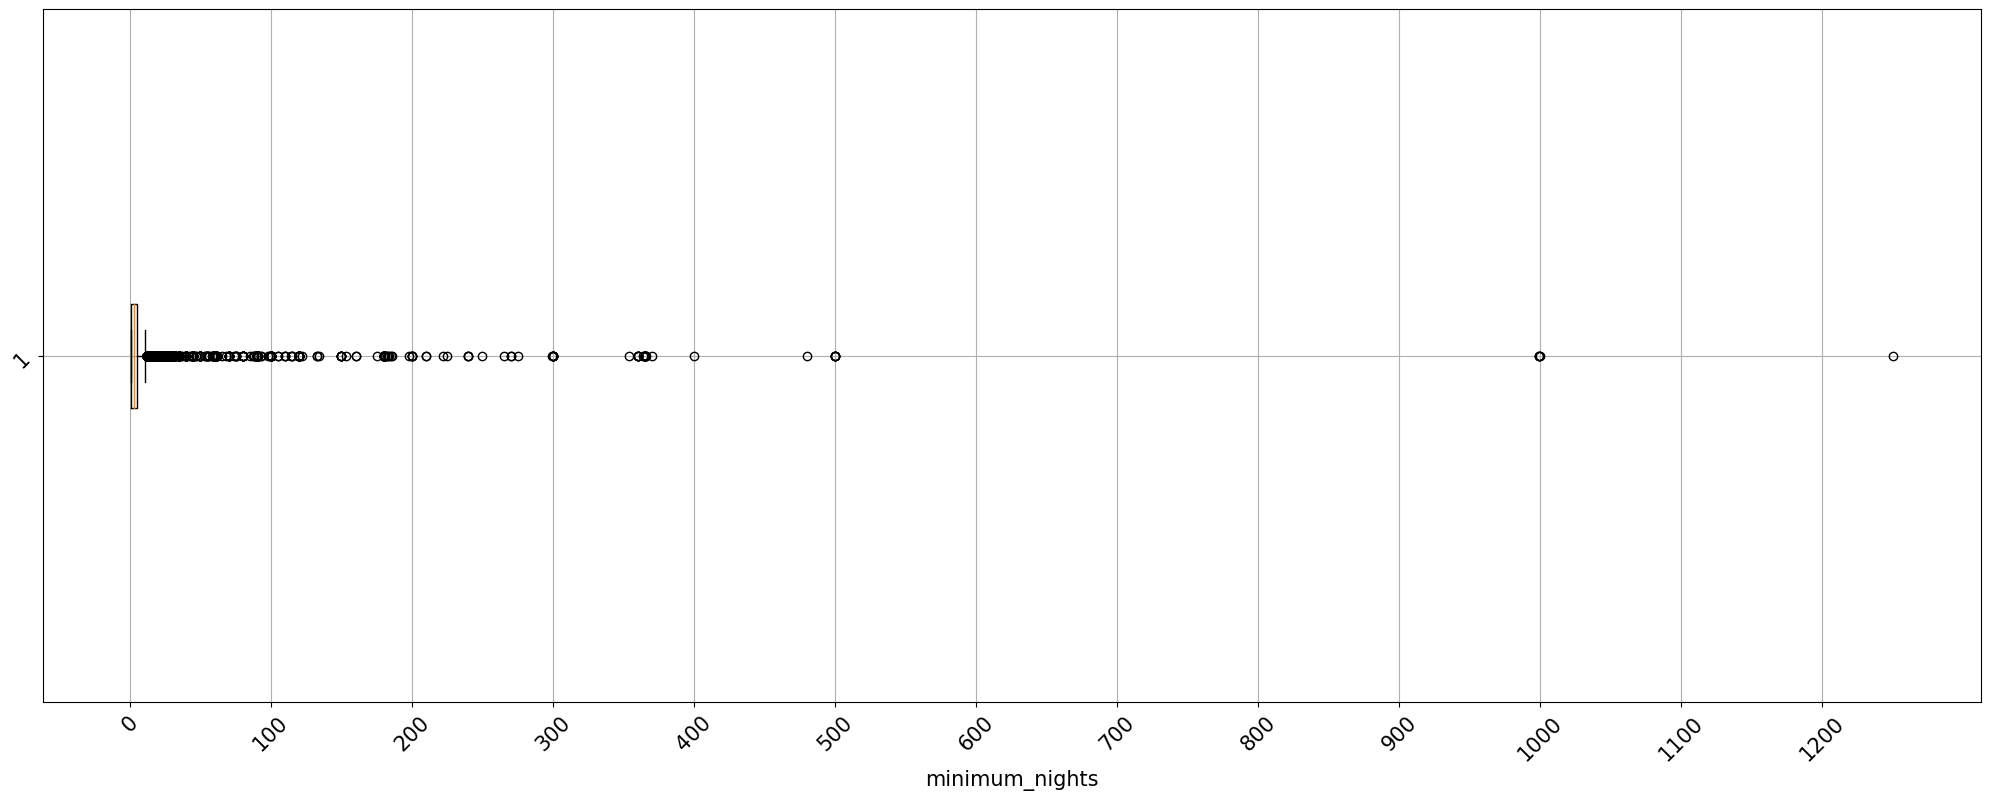

In [25]:
plt.figure(figsize=(25,9))
plt.boxplot(df.minimum_nights,vert=False)
plt.tick_params(labelsize=15,rotation=45)
plt.xticks(range(0,1300,100))
plt.xlabel("minimum_nights",size=15)
plt.grid(alpha=1)

In [26]:
df[df.minimum_nights>365]['minimum_nights'].count()

14

In [27]:
df=df[df.minimum_nights<=365]

In [28]:
df['calculated_host_listings_count'] = df.groupby('host_id')['host_id'].transform('count')

In [29]:
df.reset_index(inplace=True)

In [30]:
df.head()

index  host_id neighbourhood_group neighbourhood  latitude  longitude  \
0      0     2787            Brooklyn    Kensington  40.64749  -73.97237   
1      1     2845           Manhattan       Midtown  40.75362  -73.98377   
2      2     4632           Manhattan        Harlem  40.80902  -73.94190   
3      3     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4      4     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9      2018.0   
1  Entire home/apt    225               1                 45      2019.0   
2     Private room    150               3                  0       Never   
3  Entire home/apt     89               1                270      2019.0   
4  Entire home/apt     80              10                  9      2018.0   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2               0.00                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

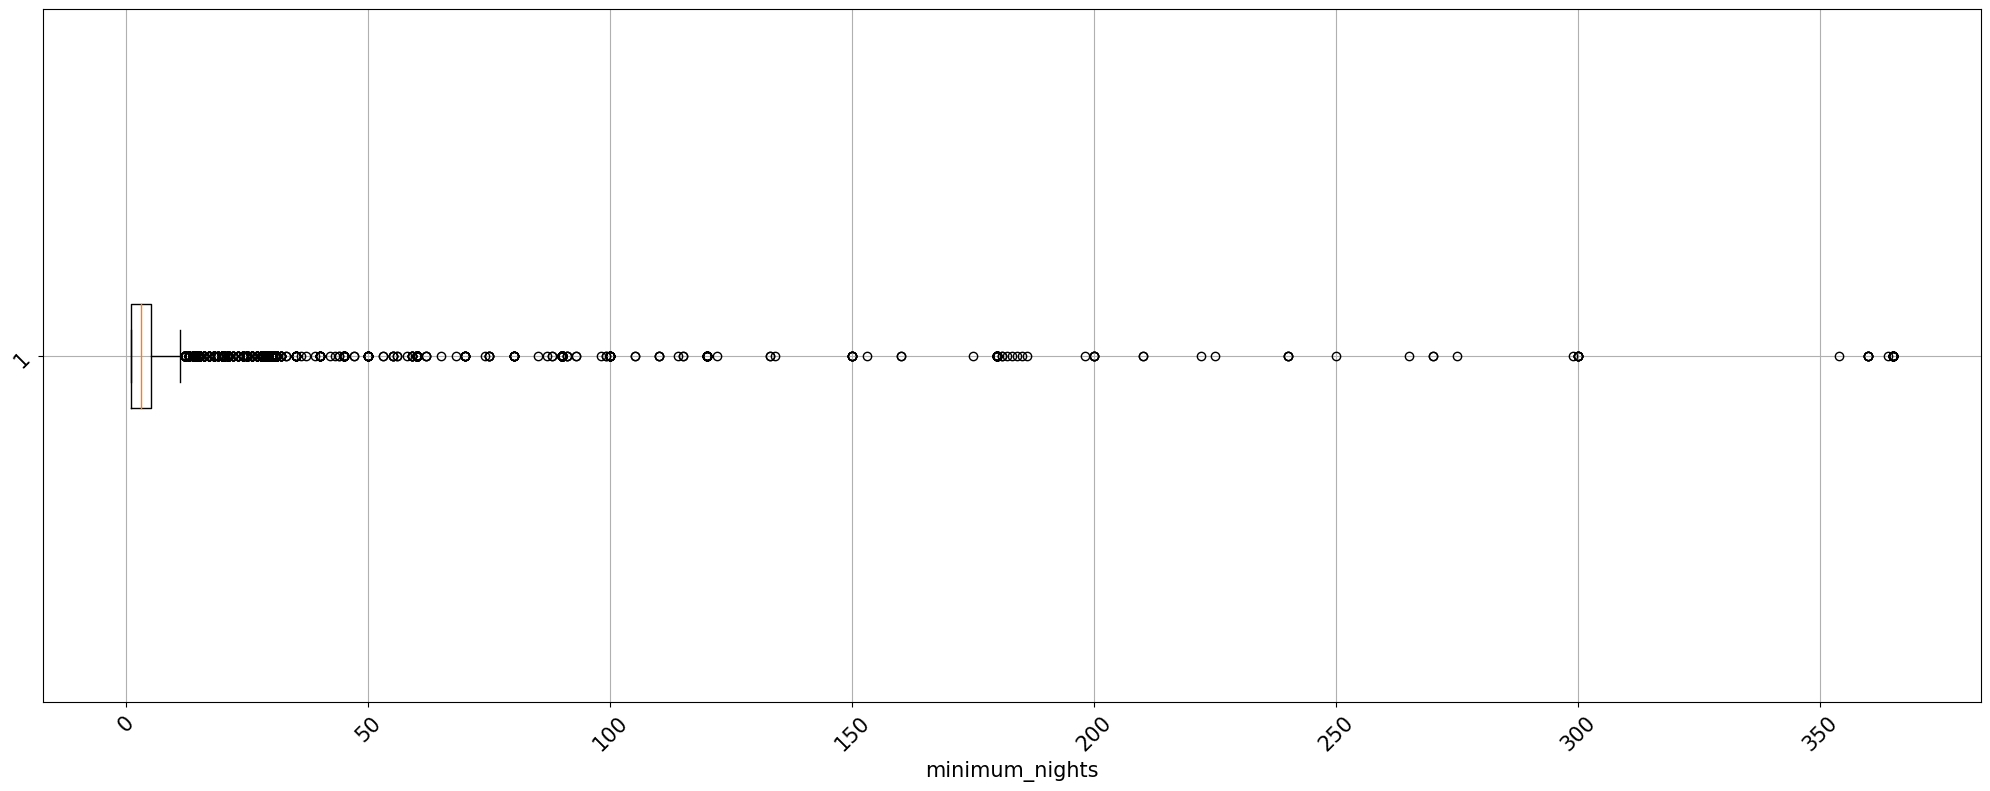

In [31]:
plt.figure(figsize=(25,9))
plt.boxplot(df.minimum_nights,vert=False)
plt.tick_params(labelsize=15,rotation=45)
# plt.xticks(range(0,400,100))
plt.xlabel("minimum_nights",size=15)
plt.grid(alpha=1)

In [32]:
df.minimum_nights.value_counts().sort_values(ascending=False).head(10)

minimum_nights
1     12720
2     11696
3      7999
30     3760
4      3303
5      3034
7      2058
6       752
14      562
10      483
Name: count, dtype: int64

### Data Engineering

In [33]:
min_night_type=[]

for i in range ( len (df)):
    if df.minimum_nights[i]<=5:
         min_night_type.append('1-5 days')
        
    elif df.minimum_nights[i]<=14:
         min_night_type.append('1-2 weeks')
            
    elif df.minimum_nights[i]<=90:
         min_night_type.append('1-3 months')
    
    elif df.minimum_nights[i]<=180:
         min_night_type.append('4-6 months')
    
    elif df.minimum_nights[i]<=365:
          min_night_type.append('7-12 months')
    
        
        

In [34]:
df['min_night_type'] = min_night_type

In [67]:
df.head()

index  host_id neighbourhood_group neighbourhood  latitude  longitude  \
0      0     2787            Brooklyn    Kensington  40.64749  -73.97237   
1      1     2845           Manhattan       Midtown  40.75362  -73.98377   
2      2     4632           Manhattan        Harlem  40.80902  -73.94190   
3      3     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4      4     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9      2018.0   
1  Entire home/apt    225               1                 45      2019.0   
2     Private room    150               3                  0       Never   
3  Entire home/apt     89               1                270      2019.0   
4  Entire home/apt     80              10                  9      2018.0   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2               0.00                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

  min_night_type  
0       1-5 days  
1       1-5 days  
2       1-5 days  
3       1-5 days  
4      1-2 weeks

### Analysis

Text(0.5, 1.0, 'neighbourhood_group')

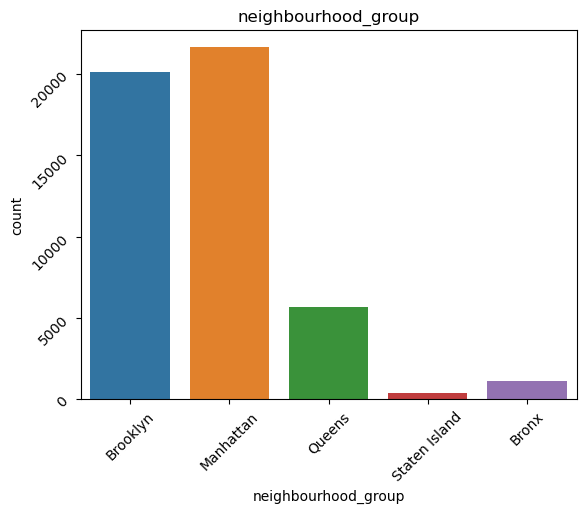

In [35]:
x='neighbourhood_group'
sns.countplot(x=x,data=df)
plt.tick_params(rotation=45)
plt.title(x)

Text(0.5, 1.0, 'room_type')

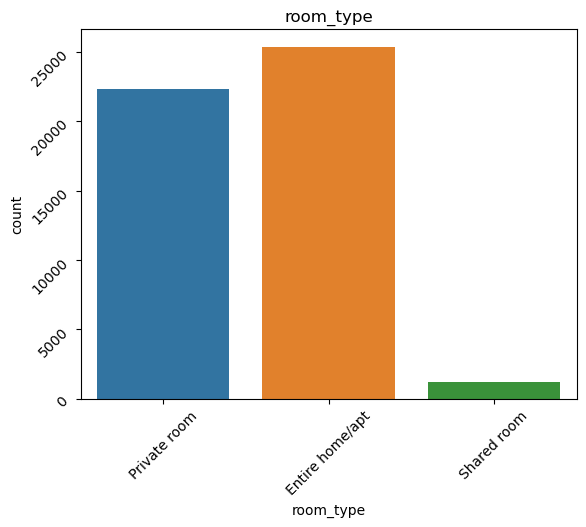

In [36]:
x='room_type'
sns.countplot(x=x,data=df)
plt.tick_params(rotation=45)
plt.title(x)

Text(0.5, 1.0, 'min_night_type')

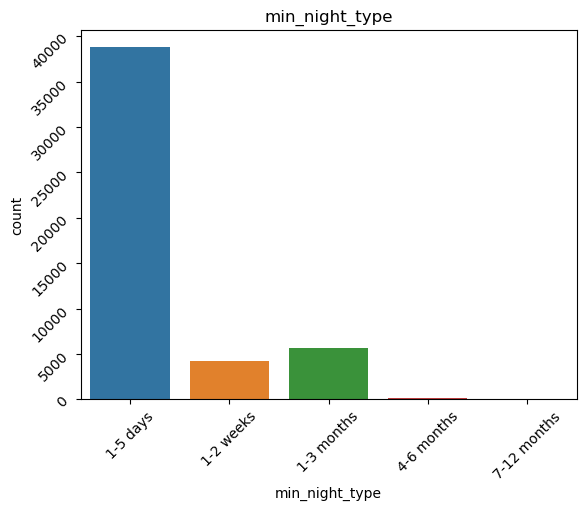

In [37]:
x='min_night_type'
sns.countplot(x=x,data=df)
plt.tick_params(rotation=45)
plt.title(x)

In [38]:
df.host_id.value_counts().sort_values(ascending=False).head(10)

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64

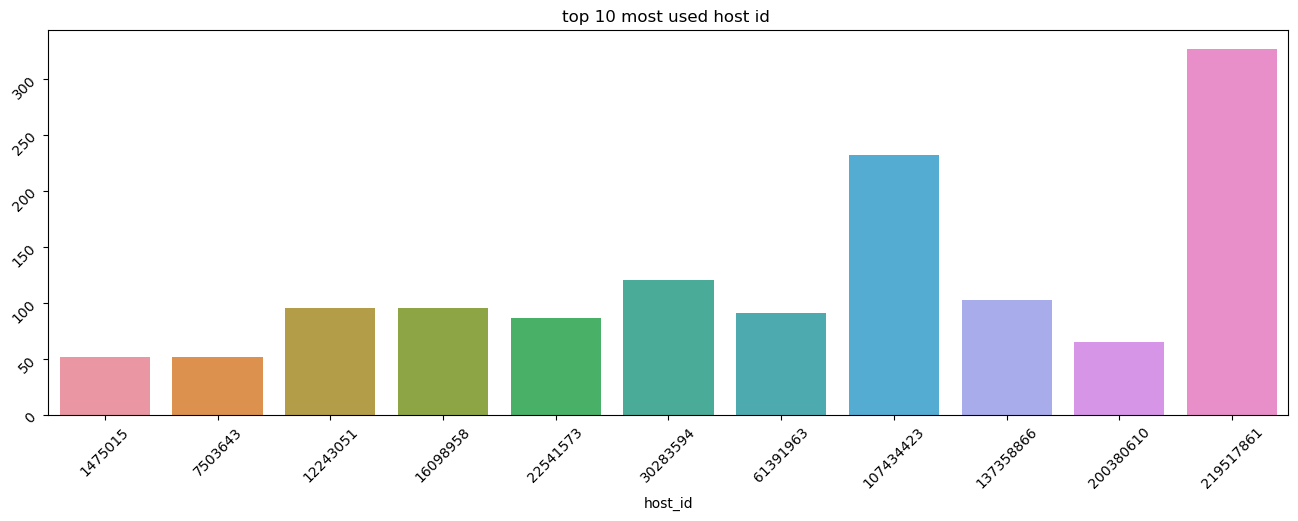

In [39]:
#Top 10 most popular Airbnb hosts
x=df.host_id.value_counts()[:11].index
y=df.host_id.value_counts()[:11].values
plt.figure(figsize=(16,5))
sns.barplot(x=x,y=y)

plt.title('top 10 most used host id ')

plt.tick_params(rotation=45)

C:\Users\Darwish\AppData\Local\Temp\ipykernel_21892\343215831.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.reviews_per_month)


<Axes: xlabel='reviews_per_month', ylabel='Density'>

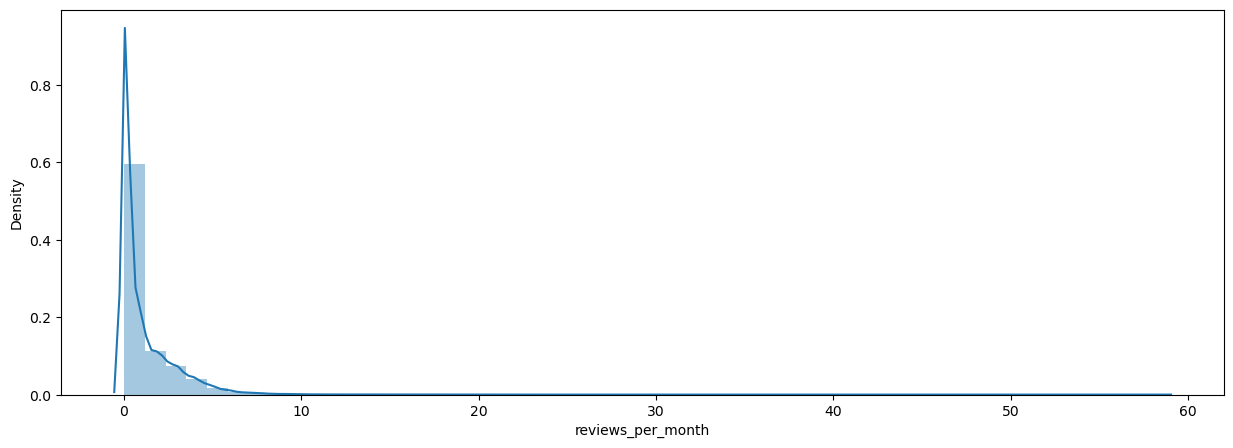

In [40]:
plt.figure(figsize=(15,5))
sns.distplot(df.reviews_per_month)

C:\Users\Darwish\AppData\Local\Temp\ipykernel_21892\415124488.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.availability_365)


<Axes: xlabel='availability_365', ylabel='Density'>

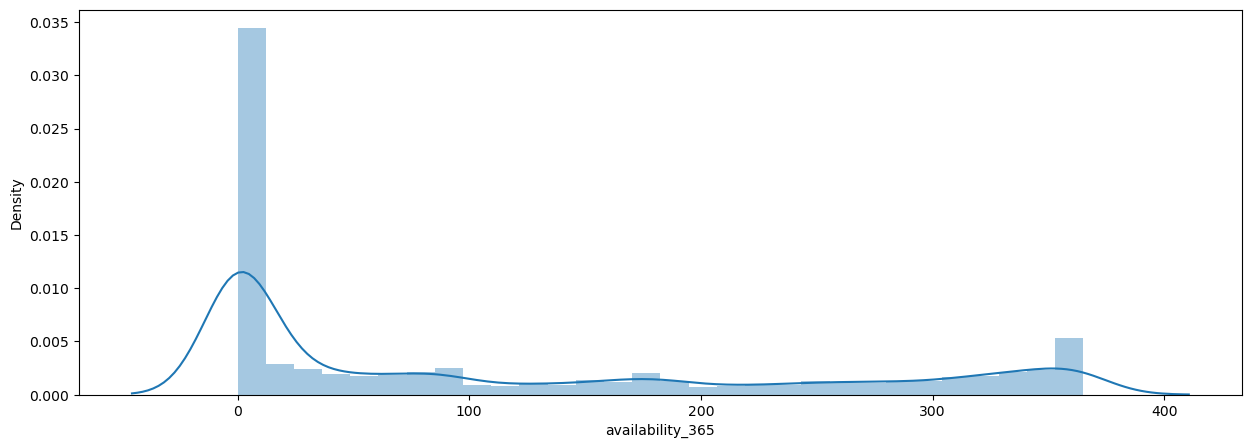

In [41]:
plt.figure(figsize=(15,5))
sns.distplot(df.availability_365)

<Axes: xlabel='longitude', ylabel='latitude'>

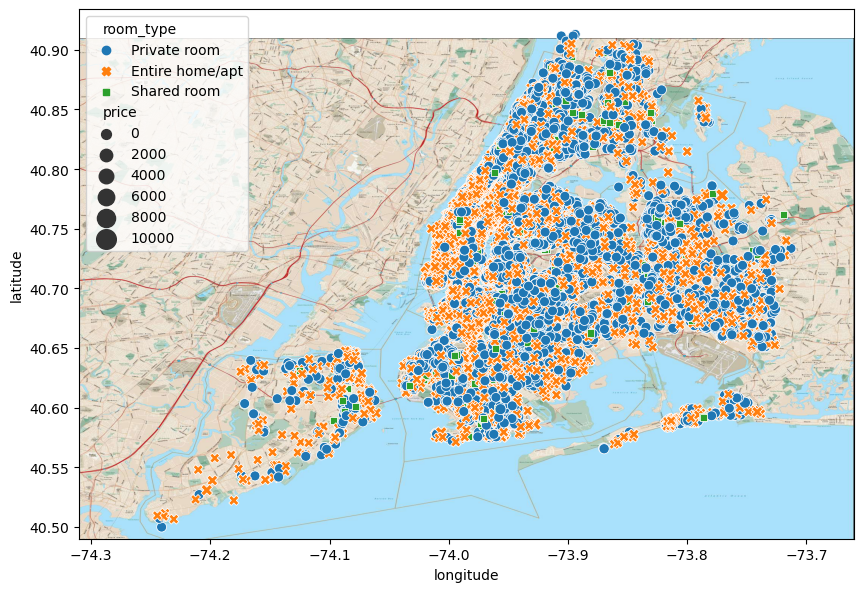

In [42]:
nycmap=plt.imread(r"D:\courses\data science all\project\Ab_NYC_2019\NYC-XX-985481.jpeg")
plt.figure(figsize=(10,20))

plt.imshow(nycmap, zorder=1, extent=[-74.31, -73.66, 40.49,40.91])


sns.scatterplot(y='latitude',x='longitude',data=df, hue='room_type',size='price',style="room_type"
                , sizes = (50, 200))
# [-74.31, -73.66, 40.49,40.91])

### Bivariate Analysis Categorical vs Continuous 

In [43]:
entire=df.groupby('room_type').get_group('Entire home/apt')
private=df.groupby('room_type').get_group('Private room')
shared=df.groupby('room_type').get_group('Shared room')
print(entire.price.max() , private.price.max() , shared.price.max())

10000 10000 1800


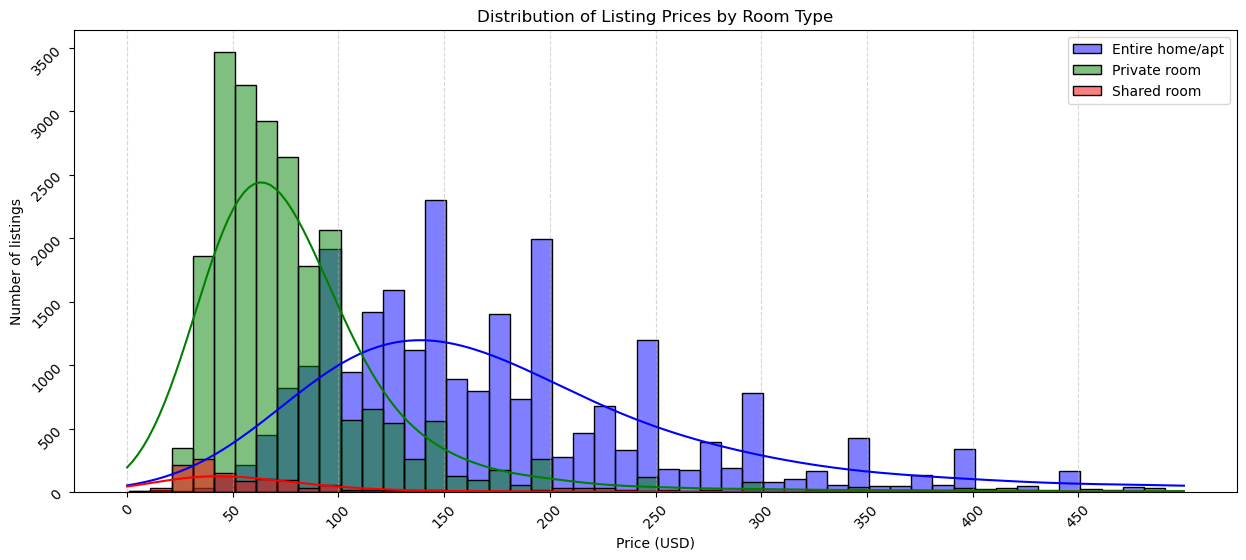

In [44]:
plt.figure(figsize=(15, 6))

sns.histplot(entire.price, bins=range(1, 500, 10), label='Entire home/apt',
             color='blue',kde=True ,kde_kws={"clip":(0,500)})
sns.histplot(private.price, bins=range(1, 500, 10), label='Private room',
             color='green',kde=True ,kde_kws={"clip":(0,500)})
sns.histplot(shared.price, bins=range(1, 500, 10), label='Shared room',
             color='red',kde=True ,kde_kws={"clip":(0,500)})

 
plt.xlabel('Price (USD)') 
 
plt.tick_params(labelbottom=True, rotation=45)   
plt.xticks(range(0, 500, 50))   
plt.grid(axis='x', linestyle='--', alpha=0.5)   
plt.legend().get_texts()
 
plt.ylabel('Number of listings')
plt.title('Distribution of Listing Prices by Room Type')
plt.show()


In [45]:
df.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        21655
Brooklyn         20098
Queens            5664
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [46]:
Manhattan=df.groupby("neighbourhood_group").get_group('Manhattan')
Brooklyn=df.groupby("neighbourhood_group").get_group('Brooklyn')
Queens=df.groupby("neighbourhood_group").get_group('Queens')
Bronx=df.groupby("neighbourhood_group").get_group('Bronx')
Staten_Island=df.groupby("neighbourhood_group").get_group('Staten Island')

Text(0.5, 1.0, 'price based on neighbourhood group')

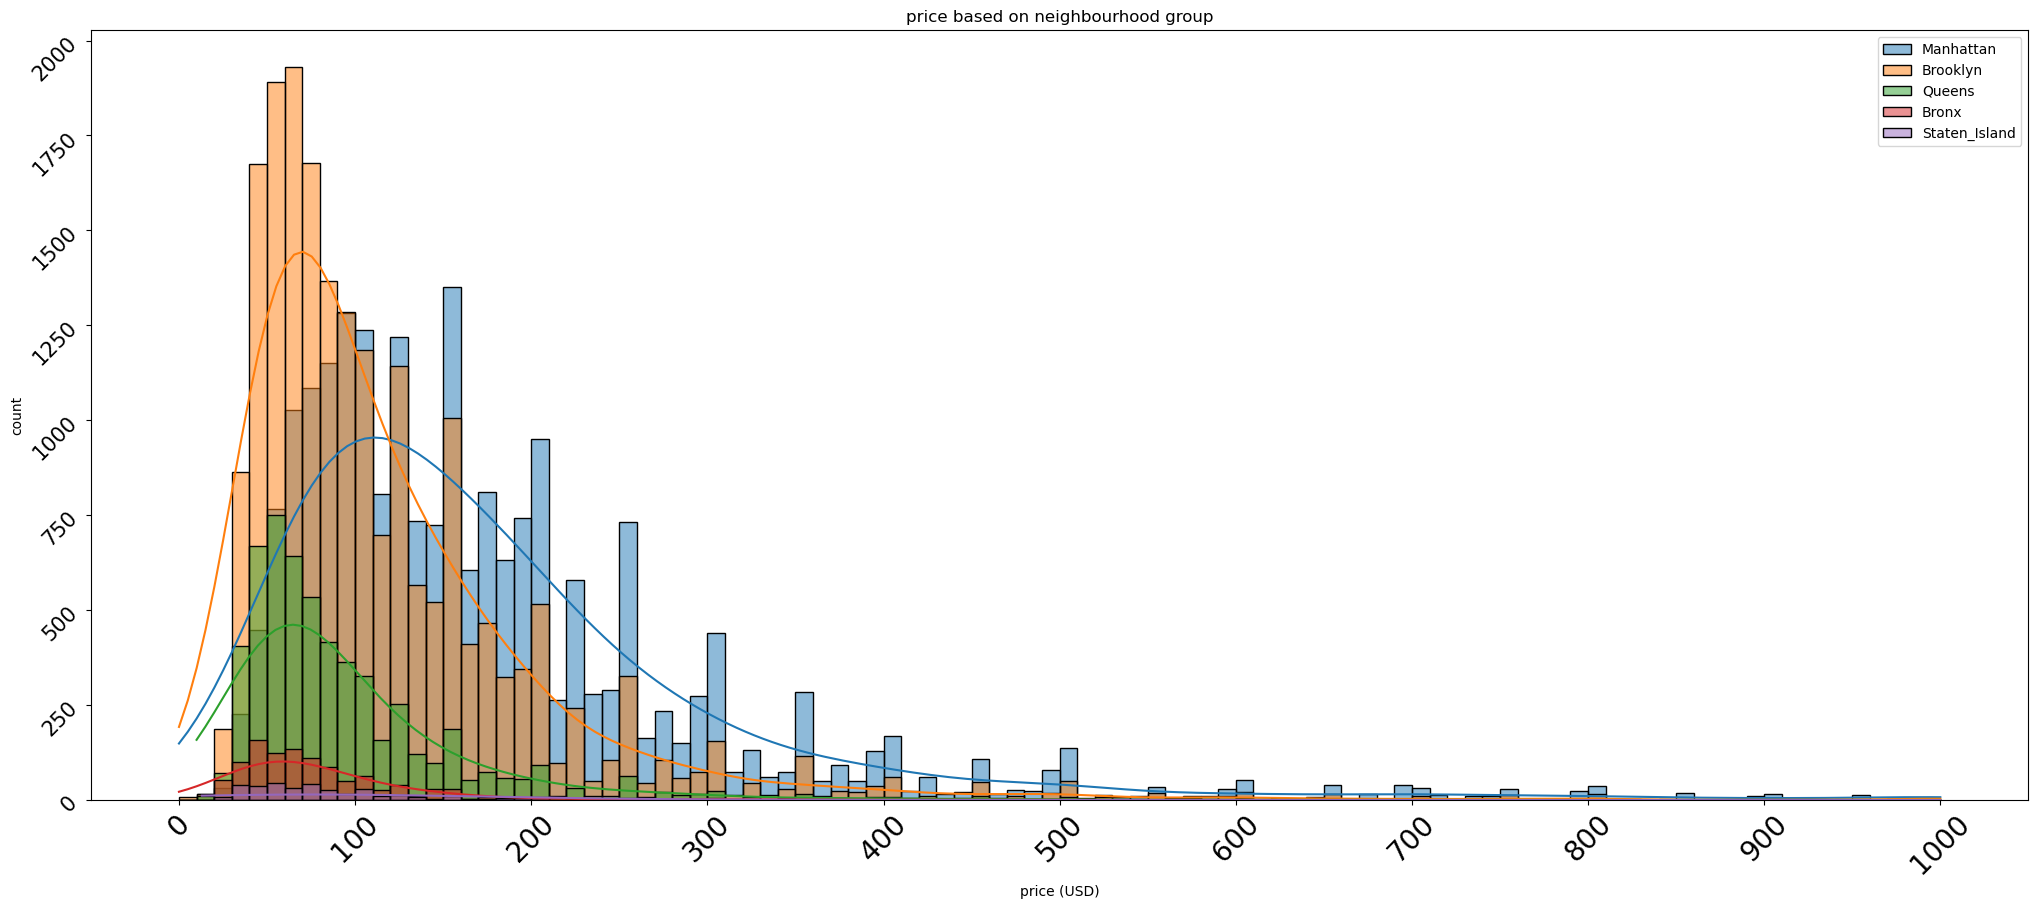

In [47]:
plt.figure(figsize=(25,10))
sns.histplot(Manhattan.price,bins=range(0,1000,10),label='Manhattan',
             kde=True,kde_kws={'clip':(0,1000)})
sns.histplot(Brooklyn.price,bins=range(0,1000,10),label='Brooklyn',
             kde=True,kde_kws={'clip':(0,1000)})
sns.histplot(Queens.price,bins=range(0,1000,10),label='Queens',
             kde=True,kde_kws={'clip':(0,1000)})
sns.histplot(Bronx.price,bins=range(0,1000,10),label='Bronx',
             kde=True,kde_kws={'clip':(0,1000)})
sns.histplot(Staten_Island.price,bins=range(0,1000,10),label='Staten_Island',
             kde=True,kde_kws={'clip':(0,1000)})

plt.legend().get_texts()
plt.tick_params(rotation=45,labelbottom=True)
plt.xticks(range(0,1001,100),size=20)
plt.yticks(size=15)
plt.xlabel("price (USD)")
plt.ylabel("count")
plt.title("price based on neighbourhood group" )

<Axes: xlabel='neighbourhood_group', ylabel='price'>

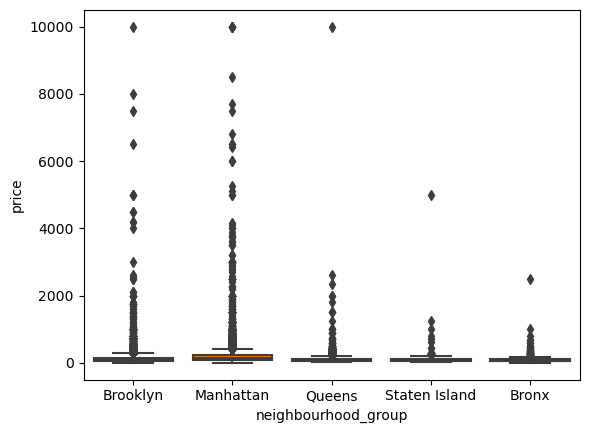

In [48]:
sns.boxplot(x='neighbourhood_group',y='price',data=df)

<Axes: xlabel='neighbourhood_group', ylabel='number_of_reviews'>

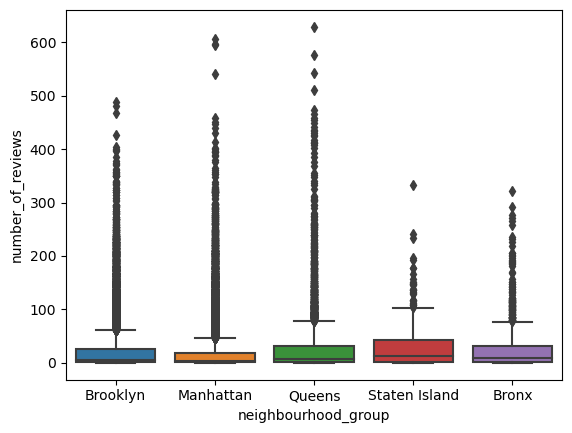

In [49]:
sns.boxplot(x='neighbourhood_group',y='number_of_reviews',data=df)

In [50]:
top_listings = df.groupby('neighbourhood_group')["number_of_reviews"].mean().sort_values( ascending = False).reset_index()
top10_listings = df.groupby(['neighbourhood_group', 'neighbourhood'])["number_of_reviews"].median().sort_values( ascending = False).reset_index().head(10)

C:\Users\Darwish\AppData\Local\Temp\ipykernel_21892\4149376937.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = 'number_of_reviews', y = 'neighbourhood', data = top10_listings, orient = 'h', ci = False, hue = 'neighbourhood_group', dodge = False, estimator = np.median).set(title = 'Top areas received the highest numbers of reviews')
D:\anaconda\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\anaconda\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


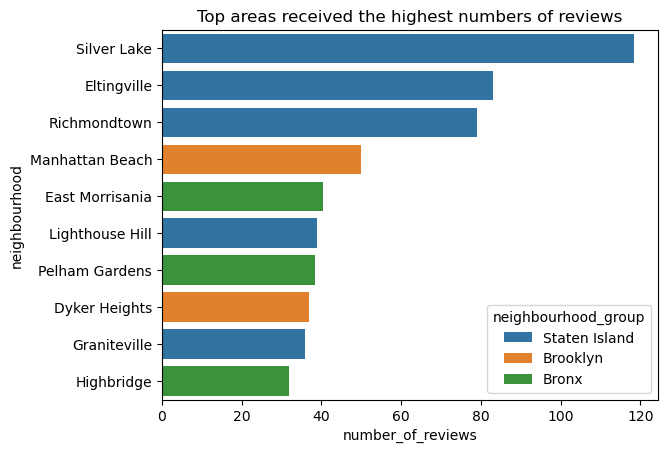

In [51]:
sns.barplot(x = 'number_of_reviews', y = 'neighbourhood', data = top10_listings, orient = 'h', ci = False, hue = 'neighbourhood_group', dodge = False, estimator = np.median).set(title = 'Top areas received the highest numbers of reviews')
plt.show()

Text(0.5, 1.0, 'avrage number of reviews based on neighbourhood_group')

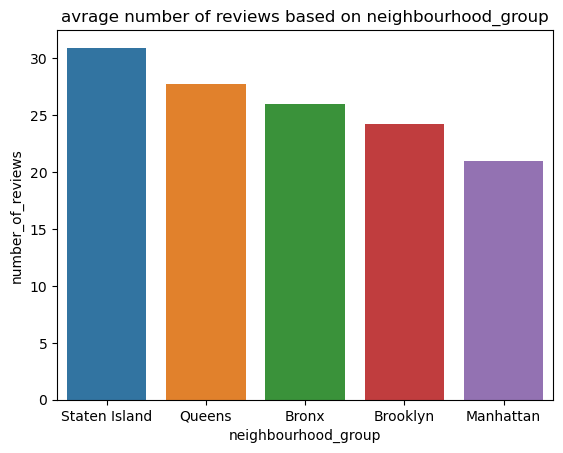

In [52]:
sns.barplot(x='neighbourhood_group',y='number_of_reviews',data=top_listings).set_title('avrage number of reviews based on neighbourhood_group')

In [53]:
top_price=df.groupby(["neighbourhood_group","room_type"])["price"].mean().sort_values(ascending=False).reset_index()

In [54]:
top_price

neighbourhood_group        room_type       price
0            Manhattan  Entire home/apt  249.257466
1             Brooklyn  Entire home/apt  178.338181
2        Staten Island  Entire home/apt  173.846591
3               Queens  Entire home/apt  147.031996
4                Bronx  Entire home/apt  127.506596
5            Manhattan     Private room  116.776622
6            Manhattan      Shared room   88.933194
7             Brooklyn     Private room   76.508195
8               Queens     Private room   71.762456
9               Queens      Shared room   69.020202
10               Bronx     Private room   66.788344
11       Staten Island     Private room   62.292553
12               Bronx      Shared room   59.800000
13       Staten Island      Shared room   57.444444
14            Brooklyn      Shared room   50.527845

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


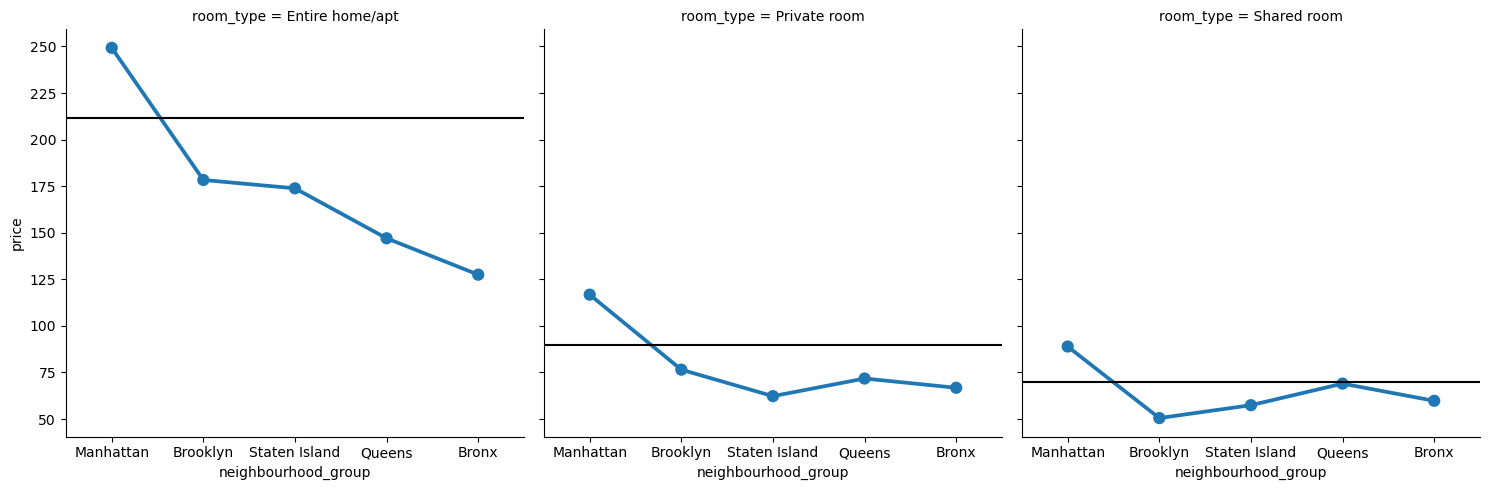

In [55]:
# Price of each room type in each area
avg_room_prices=df.groupby('room_type')['price'].mean()
g=sns.catplot(x='neighbourhood_group',y="price",data=top_price,col='room_type',kind='point')

for i in range(0,len(avg_room_prices)):
    g.axes[0][i].axhline(avg_room_prices[i],color="black")


In [56]:
host_count = df.groupby('neighbourhood_group').count().sort_values('index', ascending = False).reset_index()[['neighbourhood_group', 'index']].rename(columns = {'index': 'listings_count'})

In [57]:
customer_count = df.groupby('neighbourhood_group')['number_of_reviews'].sum().sort_values( ascending = False).reset_index()
borough_data = host_count.merge(customer_count, left_on = 'neighbourhood_group', right_on = 'neighbourhood_group', how = 'left')
borough_data['rental_rate'] = (borough_data.number_of_reviews / borough_data.listings_count).round(2)

In [58]:
borough_data

neighbourhood_group  listings_count  number_of_reviews  rental_rate
0           Manhattan           21655             454565        20.99
1            Brooklyn           20098             486534        24.21
2              Queens            5664             156920        27.70
3               Bronx            1091              28371        26.00
4       Staten Island             373              11541        30.94

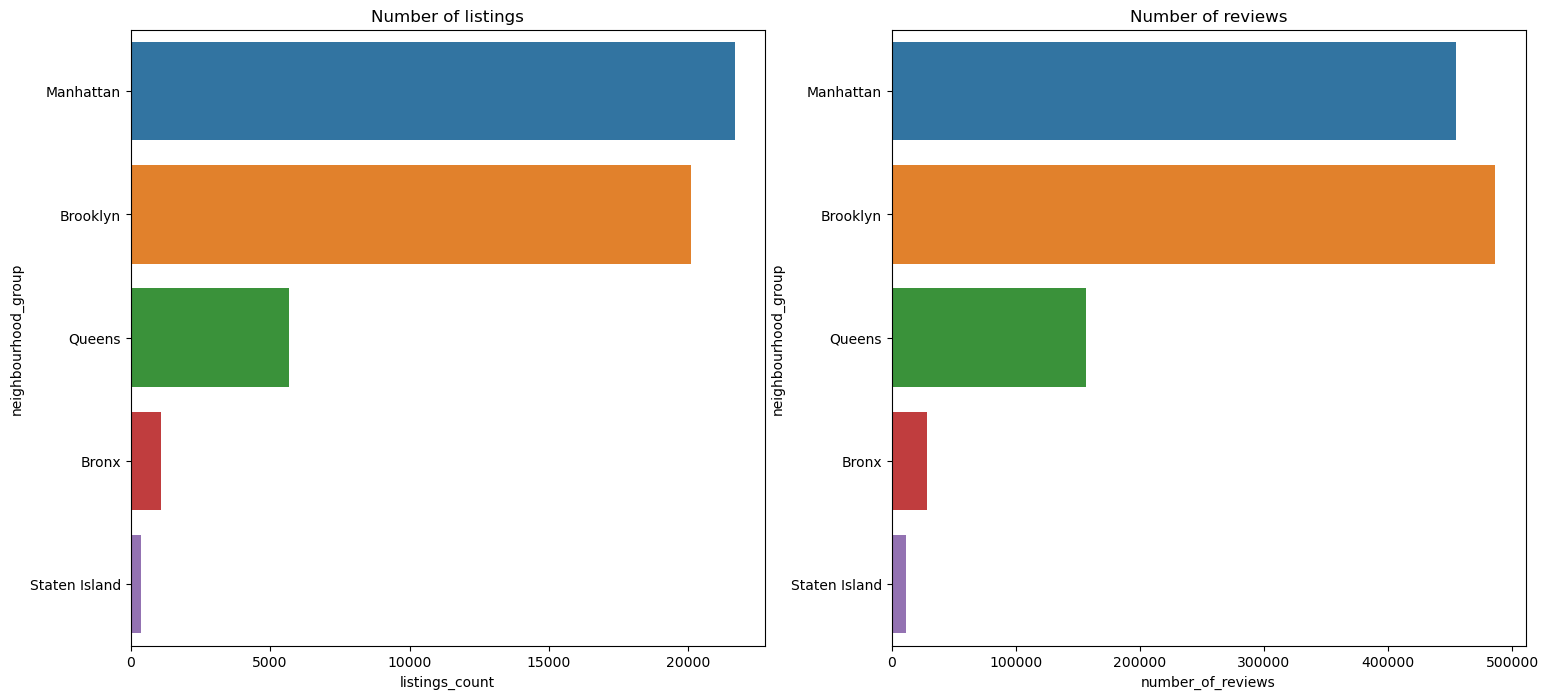

In [59]:
#Compare the listings count with reviews count

x,axis = plt.subplots(1, 2, figsize = (18, 8), squeeze = True)

sns.barplot(x = 'listings_count', y = 'neighbourhood_group', data = borough_data, orient = 'h',  ax = axis[0]).set(title = 'Number of listings')
sns.barplot(x = 'number_of_reviews', y = 'neighbourhood_group', data = borough_data, orient = 'h',  ax = axis[1]).set(title = 'Number of reviews')
plt.show()

Text(0.5, 1.0, 'rental rate')

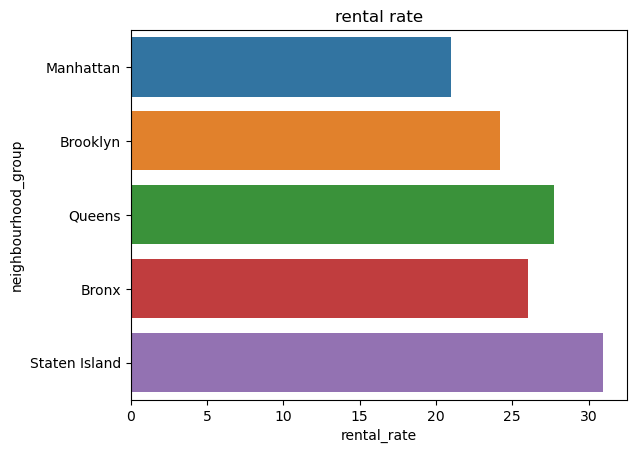

In [60]:
sns.barplot(x='rental_rate' ,y='neighbourhood_group' ,data=borough_data).set_title('rental rate')

<Axes: xlabel='neighbourhood_group', ylabel='count'>

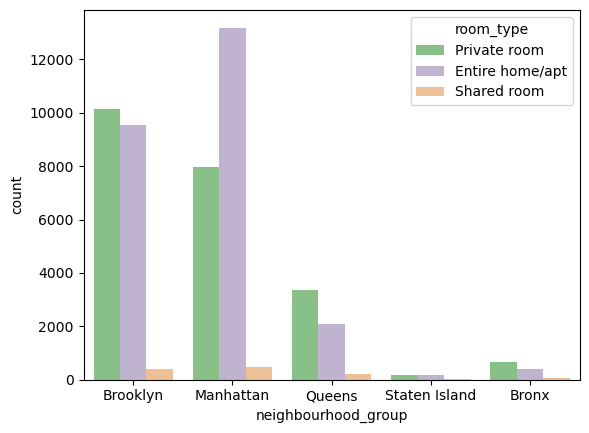

In [61]:
#neighbourhood_group vs room_type
sns.countplot(x=df["neighbourhood_group"],hue=df['room_type'],palette='Accent')

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


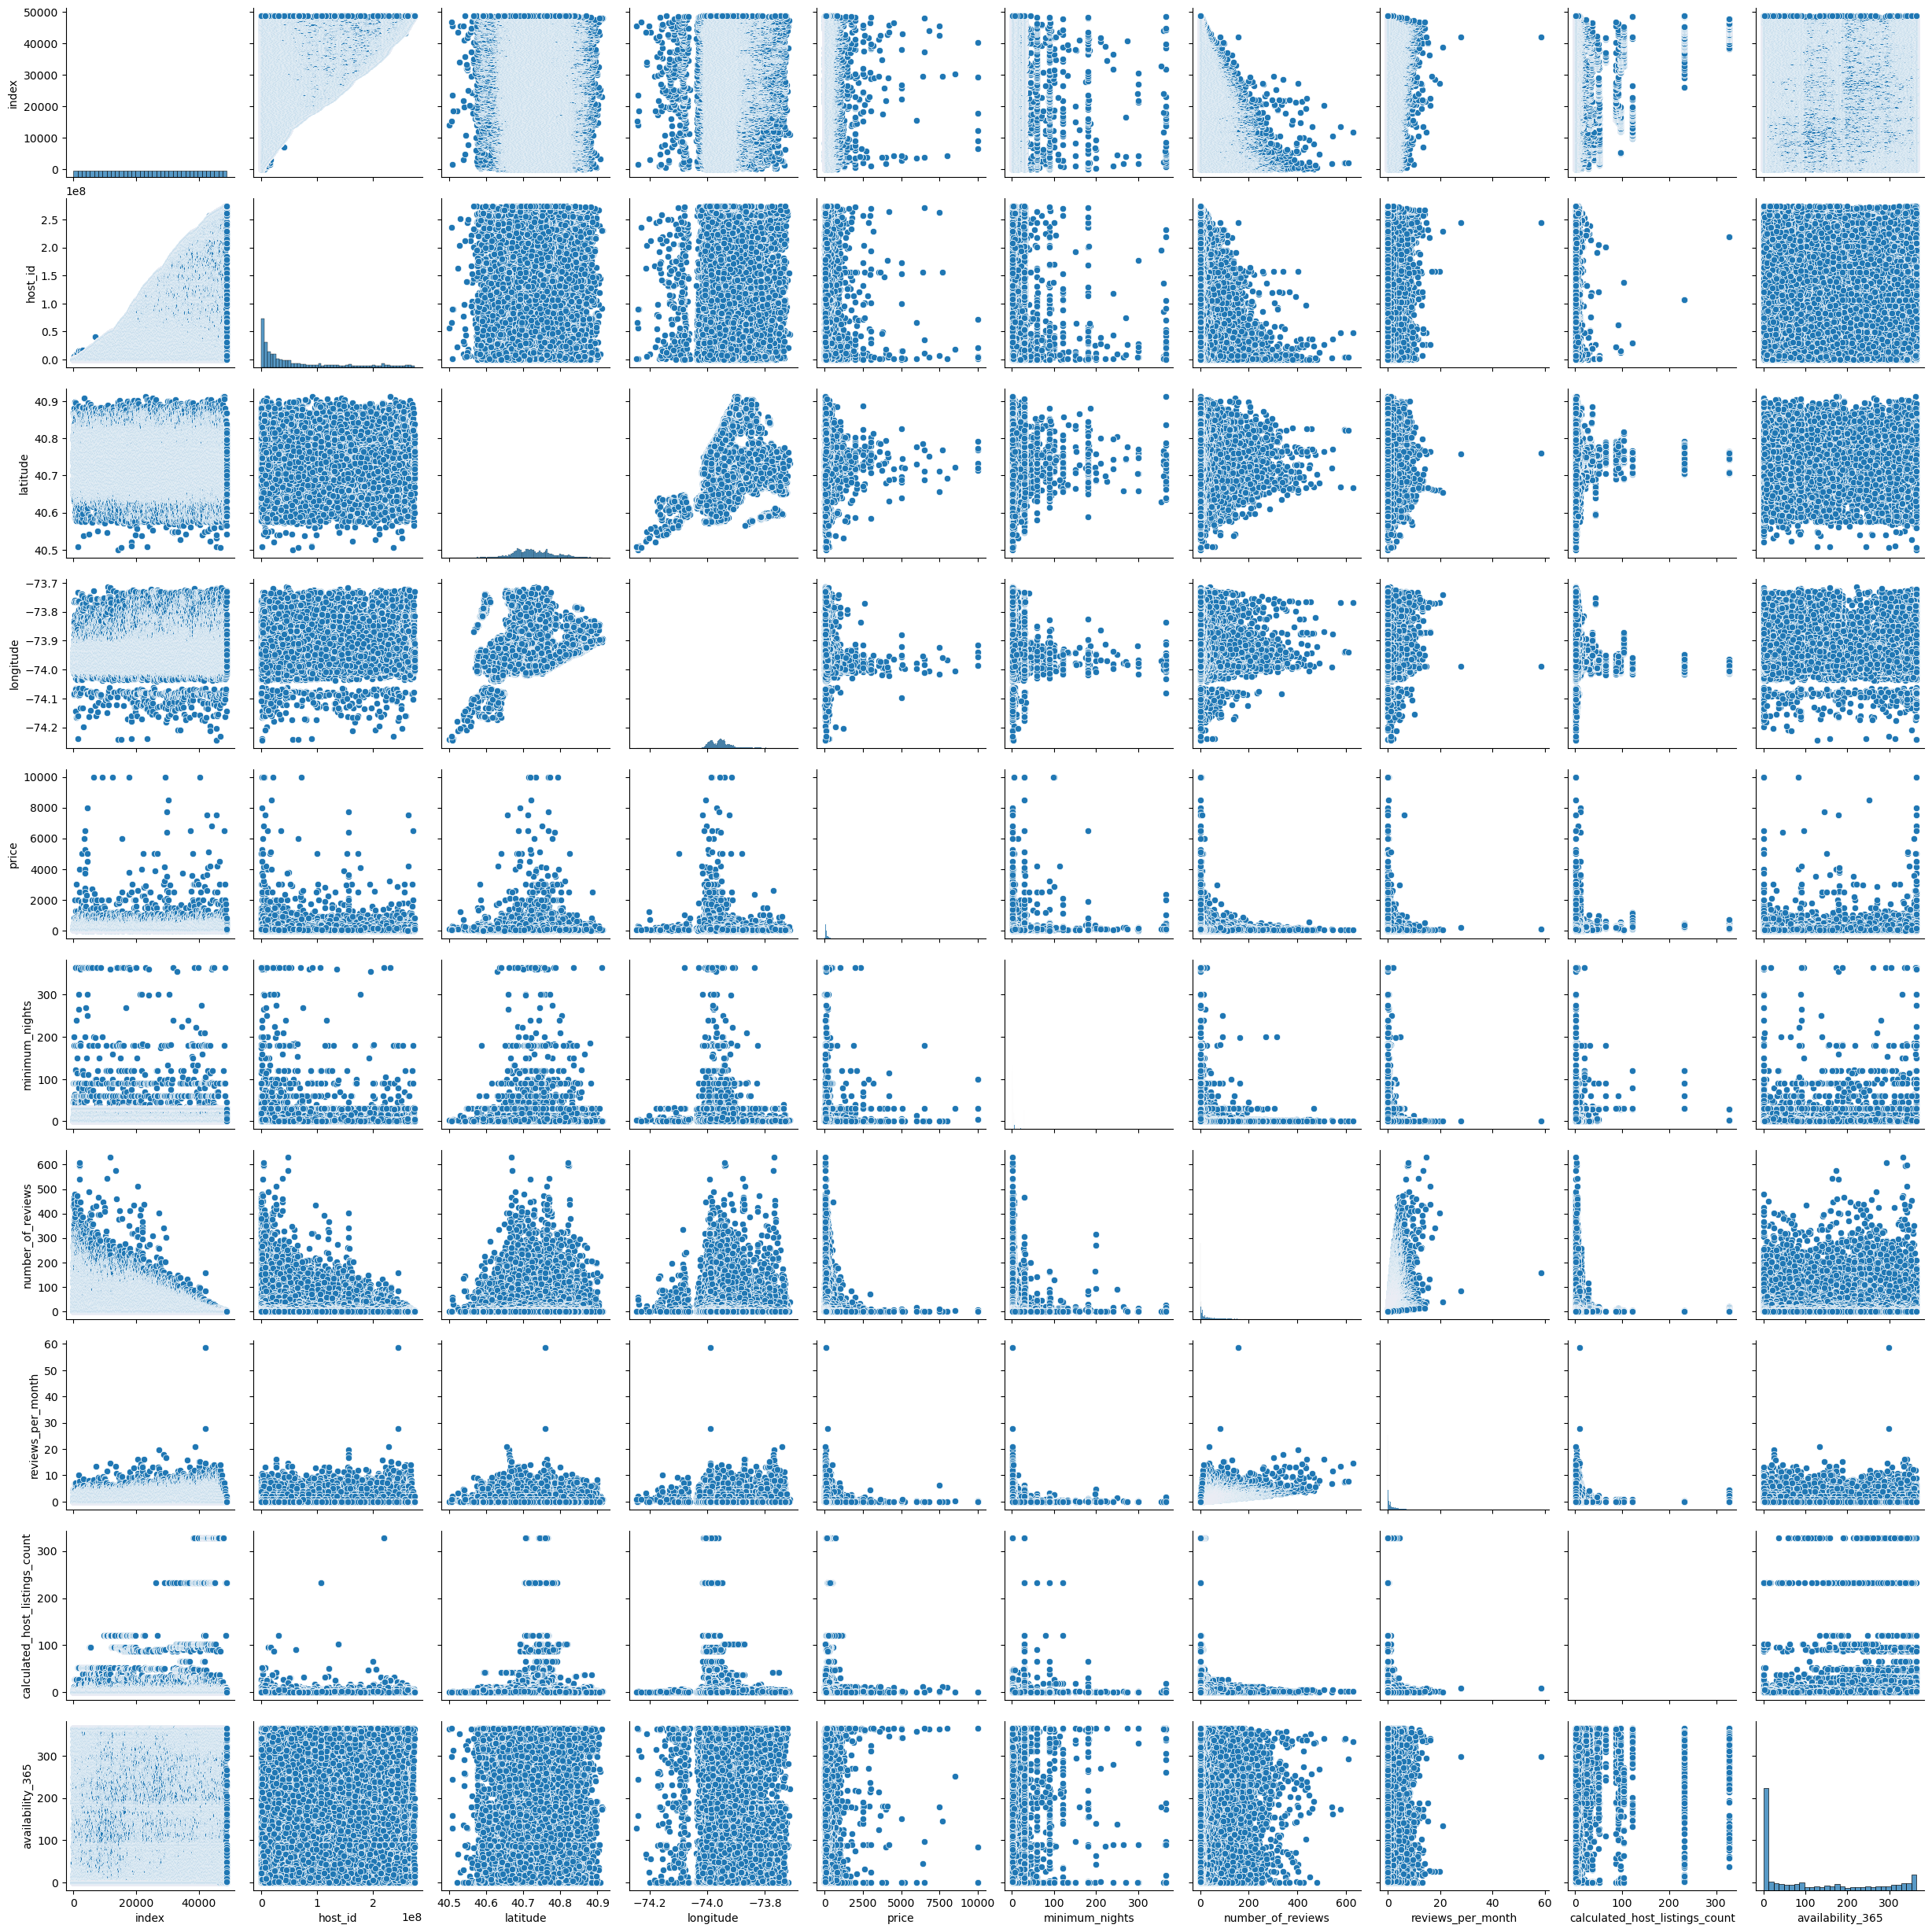

In [62]:
sns.pairplot(df[df.describe().columns])

<Axes: xlabel='reviews_per_month', ylabel='price'>

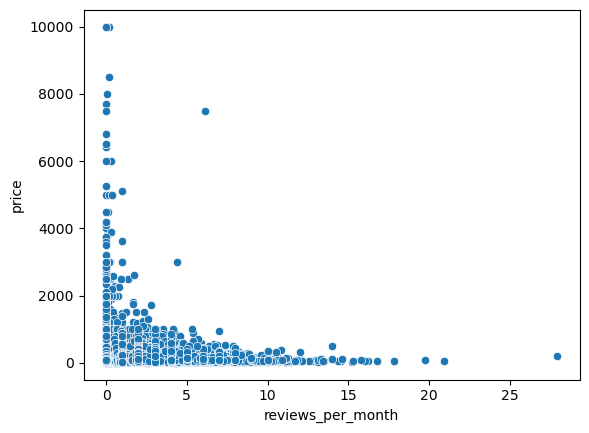

In [63]:
sns.scatterplot(x = 'reviews_per_month', y = 'price', data =df[(df['reviews_per_month']<30)])

<Axes: >

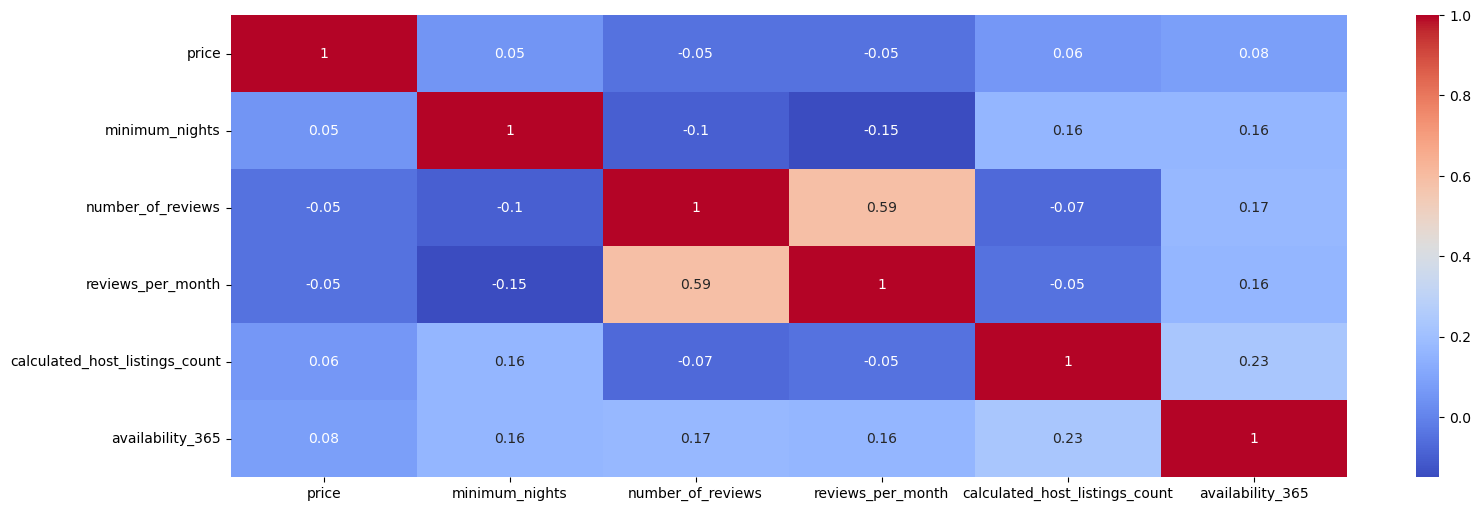

In [64]:

corr= round(df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr(),2)
plt.figure(figsize = (18,6))

sns.heatmap(corr,annot=True,cmap="coolwarm")